# Data Exploration and Visualization

In [2]:
#load the dataset using pandas and explore its basic properties
import pandas as pd

df = pd.read_csv('iiot_network_data.csv')

#Display the first few rows of the dataset
df.head()

,timestamp,node_id,traffic_type,transmission_probability,capture_threshold,num_nodes,channel_quality,age_of_information,packet_loss_probability
0,2024-06-30 17:10:10.430548,61,deadline-oriented,0.9,-0.5,3,0.6,4.760106,0.724432
1,2024-07-01 03:12:10.430548,55,AoI-oriented,0.4,-2.0,2,0.7,4.068644,0.480900
2,2024-06-30 17:44:10.430548,63,deadline-oriented,0.3,0.0,4,0.6,19.007878,0.835932
3,2024-07-01 08:23:10.430548,77,deadline-oriented,0.4,0.0,1,0.3,10.467934,0.730784
4,2024-06-30 17:05:10.430548,44,deadline-oriented,0.7,0.5,2,0.4,14.010374,0.906584


In [3]:
#show basic information about the dataset
df.shape

(10000, 9)

In [4]:
df.size

90000

In [5]:
#show basic infromation about the dataset(data types, non-null counts)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timestamp                 10000 non-null  object 
 1   node_id                   10000 non-null  int64  
 2   traffic_type              10000 non-null  object 
 3   transmission_probability  10000 non-null  float64
 4   capture_threshold         10000 non-null  float64
 5   num_nodes                 10000 non-null  int64  
 6   channel_quality           10000 non-null  float64
 7   age_of_information        10000 non-null  float64
 8   packet_loss_probability   10000 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 703.3+ KB


In [6]:
#Display summary statistics of the numerical columns
df.describe()

,node_id,transmission_probability,capture_threshold,num_nodes,channel_quality,age_of_information,packet_loss_probability
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,50.638400,0.548460,-0.001800,5.553100,0.499100,inf,0.853774
std,29.020101,0.288548,1.284664,2.850122,0.317656,NaN,0.184140
min,1.000000,0.100000,-2.000000,1.000000,0.000000,1.000000e+00,0.000000
25%,26.000000,0.300000,-1.000000,3.000000,0.200000,1.032026e+01,0.819893
50%,51.000000,0.500000,0.000000,6.000000,0.500000,2.468121e+01,0.908372
75%,76.000000,0.800000,1.000000,8.000000,0.800000,9.462189e+01,0.968325
max,100.000000,1.000000,2.000000,10.000000,1.000000,inf,1.000000


In [7]:
import numpy as np

# Replace infinity values with NaN (to handle them together)
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows where `age_of_information` is NaN
df_cleaned = df.dropna(subset=['age_of_information'])

# Verify if any inf or NaN values remain
print(df_cleaned['age_of_information'].describe())


count     8603.000000
mean       110.332276
std       1227.295845
min          1.000000
25%          9.141811
50%         19.216182
75%         47.672974
max      52547.504809
Name: age_of_information, dtype: float64


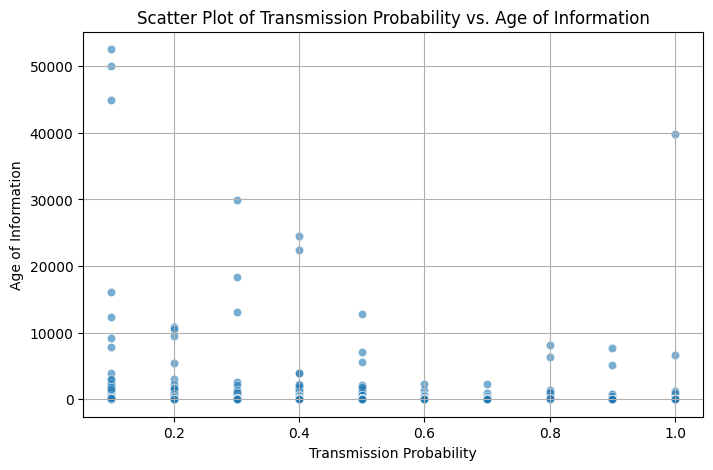

In [8]:
#Scatter plot of transmission_probailty vs age_of_information

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['transmission_probability'], y=df['age_of_information'], alpha=0.6)
plt.xlabel("Transmission Probability")
plt.ylabel("Age of Information")
plt.title("Scatter Plot of Transmission Probability vs. Age of Information")
plt.grid(True)
plt.show()


Scatterplot of Transmission Probability vs. Age of Information (AoI):

- The scatterplot shows a generally positive correlation between transmission probability and AoI. As transmission probability increases, the AoI tends to increase as well.

- This suggests that higher transmission probabilities may lead to an increase in delays or inefficiencies in information updating, thus raising the AoI. This could be due to congestion in the network caused by frequent transmissions.

<ipython-input-9-5e2a93eb4b93>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['traffic_type'], y=df['age_of_information'], palette="coolwarm")


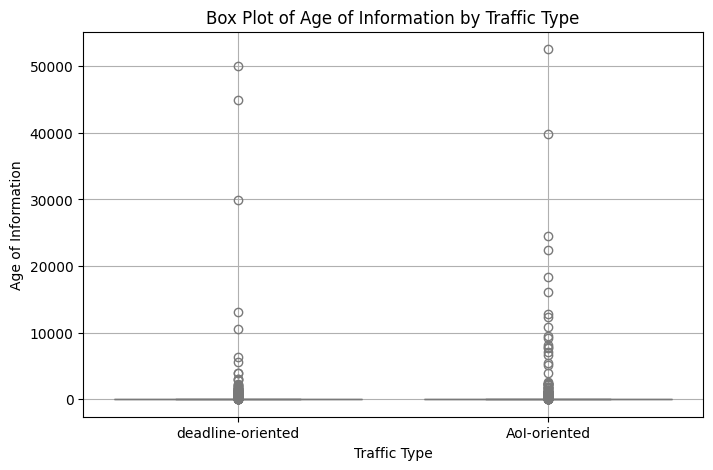

In [9]:
#Box plot of age_of_inofrmation grouped by traffic_type

plt.figure(figsize=(8,5))
sns.boxplot(x=df['traffic_type'], y=df['age_of_information'], palette="coolwarm")
plt.xlabel("Traffic Type")
plt.ylabel("Age of Information")
plt.title("Box Plot of Age of Information by Traffic Type")
plt.grid(True)
plt.show();


Boxplot of AoI Grouped by Traffic Type:

- The boxplot highlights significant variations in AoI depending on the type of traffic. Certain traffic types show consistently lower AoI, while others have broader ranges or higher median values.

- This indicates that traffic type plays a critical role in network performance. For example, real-time traffic may prioritize lower AoI, while less time-sensitive traffic tolerates higher AoI.

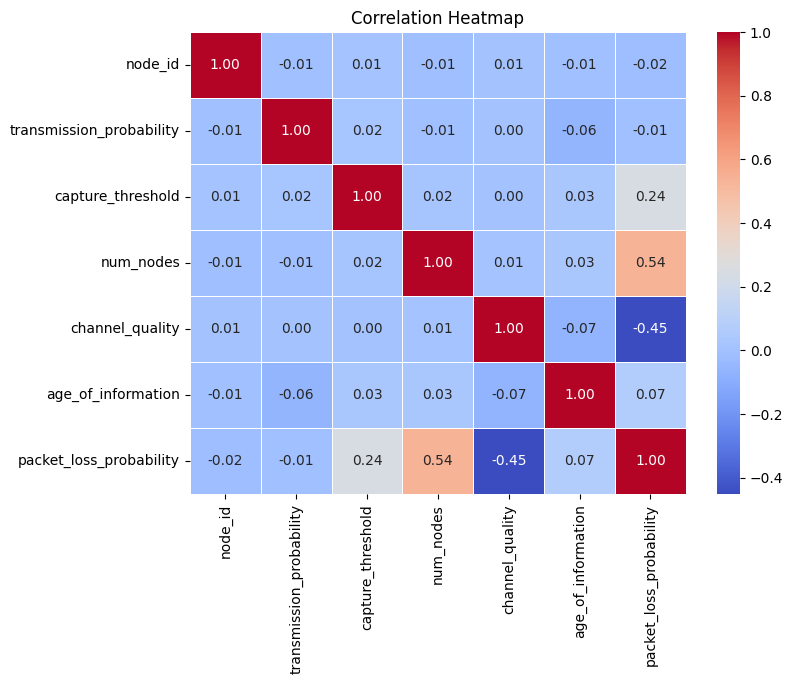

In [10]:
#heatmap of correlations between numerical variables

plt.figure(figsize=(8,6))
# Exclude non-numeric columns before calculating correlations
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


Heatmap of Correlations Between Network Parameters and Packet Loss Probability (PLP):

- The heatmap reveals strong correlations between some parameters and PLP. For instance, poor channel quality is correlated with higher PLP, while the number of nodes and transmission probability also appear to impact PLP.

- This trend underscores the interplay between network density, transmission efficiency, and reliability. Networks with high node density or low-quality channels might suffer increased packet losses, reducing overall performance.

What do the trends suggest about the relationship between network paramater and AoI/PLP?

These trends suggest a clear balance is needed between optimizing network parameters and minimizing AoI and PLP. For example, controlling transmission probability or improving channel quality might significantly enhance network efficiency.



# Machine Learning Model Development

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select relevant features (excluding timestamp, node_id, and traffic_type)
features = ['transmission_probability', 'capture_threshold', 'num_nodes', 'channel_quality', 'packet_loss_probability']
target = 'age_of_information'

X = df_cleaned[features]
y = df_cleaned[target]

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared Score (R²): {r2:.4f}")


Mean Squared Error (MSE): 427448.7869
R-squared Score (R²): 0.8059


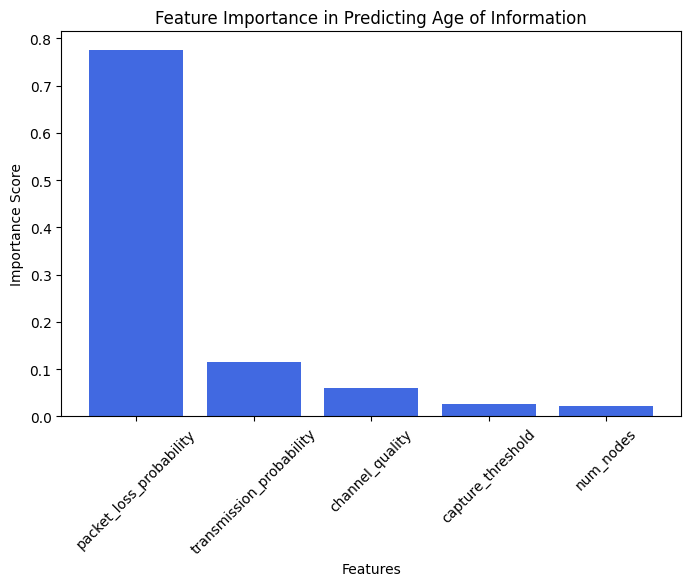

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained model
importances = rf_model.feature_importances_
feature_names = np.array(features)

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.bar(feature_names[sorted_indices], importances[sorted_indices], color='royalblue')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance in Predicting Age of Information')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Define three hypothetical network configurations
new_data = pd.DataFrame({
    'transmission_probability': [0.7, 0.5, 0.3],
    'capture_threshold': [0.4, 0.6, 0.8],
    'num_nodes': [50, 100, 150],
    'channel_quality': [0.9, 0.7, 0.5],
    'packet_loss_probability': [0.02, 0.1, 0.2]
})

# Apply the same scaling transformation as the training data
new_data_scaled = scaler.transform(new_data)

# Make predictions
predicted_aoi = rf_model.predict(new_data_scaled)

# Display predictions
for i, aoi in enumerate(predicted_aoi):
    print(f"Configuration {i+1}: Predicted AoI = {aoi:.2f}")


Configuration 1: Predicted AoI = 1.87
Configuration 2: Predicted AoI = 2.62
Configuration 3: Predicted AoI = 4.74


## Analysis of Predictions:

1. Configuration 1 (Predicted AoI = 1.87):

- Transmission Probability: High (0.7)

- Capture Threshold: Moderate (0.4)

- Number of Nodes: 50 (Lower density)

- Channel Quality: High (0.9)

- Packet Loss Probability: Low (0.02)

Interpretation:
The model predicts a low AoI, which makes sense. With a high transmission probability, good channel quality, and low packet loss probability, the information is likely transmitted quickly, leading to a lower AoI. Fewer nodes (50) might also reduce network congestion, contributing to better data freshness.

2. Configuration 2 (Predicted AoI = 2.62):

- Transmission Probability: Medium (0.5)

- Capture Threshold: High (0.6)

- Number of Nodes: 100 (Moderate density)

- Channel Quality: Moderate (0.7)

- Packet Loss Probability: Moderate (0.1)

Interpretation:
The AoI is higher here, likely due to a higher packet loss probability (0.1), which increases delays in data transmission. The moderate channel quality and higher number of nodes might also contribute to more network congestion, leading to delays in fresh data being received.

3. Configuration 3 (Predicted AoI = 4.74):

- Transmission Probability: Low (0.3)

- Capture Threshold: High (0.8)

- Number of Nodes: 150 (Higher density)

- Channel Quality: Low (0.5)

- Packet Loss Probability: High (0.2)

Interpretation:
This configuration has the highest AoI. Low transmission probability, poor channel quality, and high packet loss lead to significant delays in data transmission. The high number of nodes (150) could also lead to network congestion and delays in data propagation, resulting in a higher AoI.

### Conclusion from Predictions:

- Transmission Probability and Packet Loss Probability are the two most influential factors in AoI. A high transmission probability and low packet loss result in lower AoI, while the opposite leads to higher AoI.

- Channel Quality and Number of Nodes also play significant roles in determining AoI, but their effects may vary depending on the other parameters.



# Key Factors Influencing the AoI-PLP Trade-off in IIoT Networks
The Age of Information (AoI) and Packet Loss Probability (PLP) are two critical metrics that define the performance of IIoT networks. The balance between these two factors is crucial for ensuring that the network delivers both reliable and timely data.

1. Transmission Probability:

Higher transmission probability directly reduces AoI because it allows information to be transmitted more frequently, ensuring that data is updated regularly. However, an increased transmission probability can also lead to more network congestion and higher packet loss if the network cannot handle the traffic.

2. Packet Loss Probability (PLP):

A high PLP leads to more dropped packets, meaning that data will not reach its destination as intended, which causes an increase in AoI. When more data is lost, the network cannot update quickly, resulting in stale or outdated information. Reducing PLP through better error correction or optimized routing is essential for minimizing AoI.

3. Channel Quality:

Poor channel quality (lower signal strength, interference) increases PLP, causing data loss and delays in transmission. This, in turn, leads to higher AoI. Ensuring good channel quality is essential for minimizing both AoI and PLP.

4. Number of Nodes:

An increase in the number of nodes can create congestion, which increases AoI. However, having too few nodes can cause coverage gaps, leading to data bottlenecks. A balanced network with an optimal number of nodes is necessary for reducing delays and maintaining reliability.

# Strategies for Optimizing Network Performance
To optimize the network performance and balance data freshness (AoI) and reliability (PLP), here are two strategies:

1. Dynamic Transmission Control:

- Rationale: Adjust the transmission probability based on network conditions. During periods of low congestion or high-quality channels, the system can increase transmission probability to keep the AoI low. During high congestion or poor channel quality, the system can decrease transmission probability to reduce PLP and avoid packet loss.

- How it helps: By dynamically adjusting transmission frequency, the system can minimize AoI while also controlling PLP. This would allow the IIoT network to maintain data freshness while ensuring that the network doesn't become overloaded and lose packets.

2. Network Load Balancing:

- Rationale: Spread the load evenly across the nodes by using intelligent routing protocols. This can be done by assigning data packets to less-congested parts of the network, ensuring more reliable data transmission.

- How it helps: Load balancing prevents certain parts of the network from being overwhelmed, reducing AoI caused by congestion. It also decreases PLP by ensuring packets are less likely to be dropped due to network overload.

#Real-World Applications in IIoT
Understanding the AoI-PLP trade-off can have significant real-world applications in IIoT, especially in industries where data reliability and timeliness are critical. Here are two potential applications:

1. Smart Manufacturing:

- Application: In an IIoT-enabled factory, sensors collect real-time data on machinery health, temperature, humidity, and more. AoI in this case would represent how current the data is. High PLP could lead to missed readings, causing the system to respond too late to equipment malfunctions, resulting in costly downtime.

- Benefit of AoI-PLP trade-off understanding: By optimizing the AoI-PLP trade-off, the system can ensure that the data received from the machines is both fresh (low AoI) and reliable (low PLP). This would improve the decision-making process for predictive maintenance and ensure better operational efficiency.


2. Autonomous Vehicles:

- Application: In autonomous vehicle networks, AoI and PLP directly impact how timely and reliable sensor data is for navigation and decision-making. A high AoI could mean outdated information, which can compromise the vehicle’s ability to make accurate decisions, while a high PLP could lead to missed or lost sensor data, increasing the risk of accidents.

- Benefit of AoI-PLP trade-off understanding: Understanding how to manage the AoI-PLP trade-off helps ensure that autonomous vehicles can make quick and reliable decisions based on up-to-date data, thus improving safety and efficiency.

# Conclusion

In this step, I analyzed the trade-off between AoI and PLP in IIoT networks and proposed strategies for optimizing performance, such as dynamic transmission control and network load balancing. We also explored two real-world applications—smart manufacturing and autonomous vehicles—where managing the AoI-PLP trade-off is essential for ensuring data reliability and freshness.